In [2]:
import os
print(os.getcwd())

C:\Users\Riccardo\Documents\GitHub\DWM-Project\Progetto


In [3]:
import pandas as pd 
data = pd.read_csv("train.csv")


In [4]:
print("data.shape:", data.shape)
print("data.index:", data.index)
print("data.columns:", data.columns)

data.shape: (3000, 23)
data.index: RangeIndex(start=0, stop=3000, step=1)
data.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


In [5]:
data.drop(['homepage'],axis=1,inplace=True)

### data["genres"]

In [6]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [7]:
def convertAll():
    import math
    import datetime

    data["release_date"] = pd.to_datetime(data["release_date"])
    #fix della data in quanto ci sono date che superano il 2021
    i=0
    maxDate = datetime.datetime(2020, 1, 1)
    n_elem = data.shape[0]
    while i<n_elem:
        if data['release_date'][i]>maxDate:
            new_year=(data['release_date'][i].year)-100
            new_date = datetime.datetime(new_year, data['release_date'][i].month, data['release_date'][i].day, 0, 0, 0)
            data['release_date'][i] = new_date
        i+=1
    i=0
    n_elem = data.shape[0]
    while i<n_elem:
        if isinstance(data["genres"][i], float):
            if math.isnan(data["genres"][i]):
                i+=1
                continue
        data["genres"][i]=eval(data["genres"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["production_countries"][i], float):
            if math.isnan(data["production_countries"][i]):
                i+=1
                continue
        data["production_countries"][i]=eval(data["production_countries"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["spoken_languages"][i], float):
            if math.isnan(data["spoken_languages"][i]):
                i+=1
                continue
        data["spoken_languages"][i]=eval(data["spoken_languages"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["Keywords"][i], float):
            if math.isnan(data["Keywords"][i]):
                i+=1
                continue
        data["Keywords"][i]=eval(data["Keywords"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["cast"][i], float):
            if math.isnan(data["cast"][i]):
                i+=1
                continue
        data["cast"][i]=eval(data["cast"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["crew"][i], float):
            if math.isnan(data["crew"][i]):
                i+=1
                continue
        data["crew"][i]=eval(data["crew"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["production_companies"][i], float):
            if math.isnan(data["production_companies"][i]):
                i+=1
                continue
        data["production_companies"][i]=eval(data["production_companies"][i])
        i+=1


In [8]:
convertAll()

<ipython-input-7-1ae77e7ce95a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'][i] = new_date
<ipython-input-7-1ae77e7ce95a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genres"][i]=eval(data["genres"][i])
<ipython-input-7-1ae77e7ce95a>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["production_countries"][i]=eval(data["production_countries"][i])
<ipython-input-7-1ae77e7ce95a>:41: SettingWithCop

In [9]:
def get_words (data):
    import math
    descrizioni = []
    i=0
    while i<1000:
        if isinstance(data["overview"][i], float):
            if math.isnan(data["overview"][i]):
                empty_list=[]
                descrizioni += empty_list
                i+=1
                continue
        desc = data["overview"][i]         # this is a string
        words = desc.split() # this is a list
        words = set(words)     # create a set
        descrizioni += [words] # append words to the list
        i=i+1
    return descrizioni

In [10]:
lyrics_word_split = get_words(data)

print ( lyrics_word_split[3] )

{'arrives', 'end', 'pregnant', 'own', 'what', 'rely', 'that', 'begins', 'city', 'unborn', '-', 'determined', 'child', 'to', 'She', 'dead', 'search', '(Vidya', 'reach', 'when', 'Vidya', 'herself', 'lies,', 'of', 'except', 'London', 'she', 'husband', 'for', 'on', 'Bagchi.', 'even', 'truth', 'husband.', 'tries', 'find', 'alone', 'and', 'from', 'soaked', 'does', 'at', 'months', 'him,', 'unravel', 'memories', 'all', 'city,', 'Balan)', 'life.', 'convince', 'nothing', 'Arnab', 'her', 'not', 'in', 'Seven', 'a', 'cost', 'it', 'Kolkata', 'With', 'the', 'relentless', 'In', 'clues', 'seems.', 'is', 'fragments', 'about', 'Bagchi', 'slowly', 'missing', 'exist.', 'everyone', 'festive', 'realises', 'seem'}


In [11]:
def jaccard(a,b):
    return len(a & b) / len( a | b)

In [12]:
jaccard(lyrics_word_split[0],lyrics_word_split[123])

0.06896551724137931

In [13]:
def most_similar_jaccard(film_ricerca, lyrics_word_split):
    most_similar_id=1
    jaccard_most_similar=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[2])
    list_size=len(lyrics_word_split)
    current_id=2
    while current_id<list_size:
        current_sim=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[current_id])
        if current_sim>jaccard_most_similar:
            jaccard_most_similar=current_sim
            most_similar_id=current_id
        current_id=current_id+1
    
    return most_similar_id, jaccard_most_similar

sim_id, sim_value = most_similar_jaccard(0, lyrics_word_split)

IndexError: single positional indexer is out-of-bounds

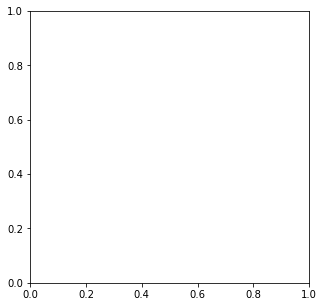

In [14]:
# plot film with revenue on X and budget on Y. There are budget's row with 0 value.
%matplotlib inline 
import matplotlib.pyplot as plt
# use the following for more interactive plots
# %matplotlib inline 

import numpy as np
fig, ax = plt.subplots(figsize=(5,5))

#https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different
ax.scatter(data.iloc[:, 2], data.iloc[:, 22])

In [15]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(data.iloc[:, 1:3])
data.iloc[:, 1:3] = imputer.transform(data.iloc[:, 1:3])

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: "[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

data_with_budget.shape: (2188, 22)


Text(0.5, 1.0, 'Revenue based on budget per movie')

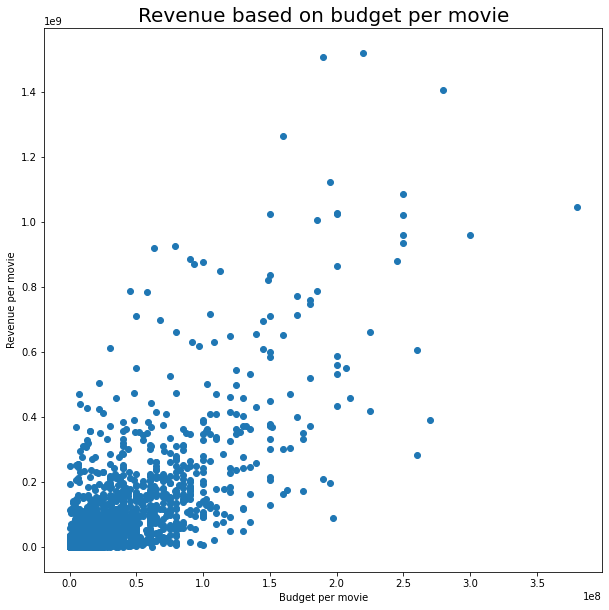

In [17]:
#data_with_budget: array tolti gli elementi con budget = 0
data_with_budget = data[data["budget"] != 0]
print("data_with_budget.shape:", data_with_budget.shape)

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(data_with_budget.iloc[:, 2], data_with_budget.iloc[:, 21])

ax.set_xlabel("Budget per movie", fontsize=10)
ax.set_ylabel("Revenue per movie", fontsize=10)
ax.set_title('Revenue based on budget per movie', fontsize=20)

In [18]:
# The number of the beast
sum(data_with_budget['revenue'] <= 10000000)

666

In [19]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#matrix budget-revenue
matrice = [len(data_with_budget)][2]
br = [data_with_budget['budget'], data_with_budget['revenue']]

k_means = KMeans(n_clusters=5, n_init=1)
k_means.fit(br)


fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(br.iloc[0, :], br.iloc[1, :], c=k_means.labels_)

IndexError: list index out of range

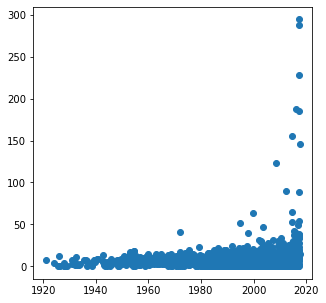

In [20]:
from datetime import datetime
import matplotlib.pyplot as plt

data = data.sort_values(by="release_date")
data["release_date"] = pd.to_datetime(data["release_date"])

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data['release_date'], data['popularity'])


In [21]:
#c'è un problema, ci sono date errate in quanto sono spostate avanti di 100 annic
#da sistemare

max(data['release_date'])


Timestamp('2017-07-20 00:00:00')

In [22]:
data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [23]:
#aggiunta la colonna anno di uscita
#per evitare errori usare il .dt per estrarre info dalle date
data["release_year"]=data["release_date"].dt.year


(1960.0, 2021.8)

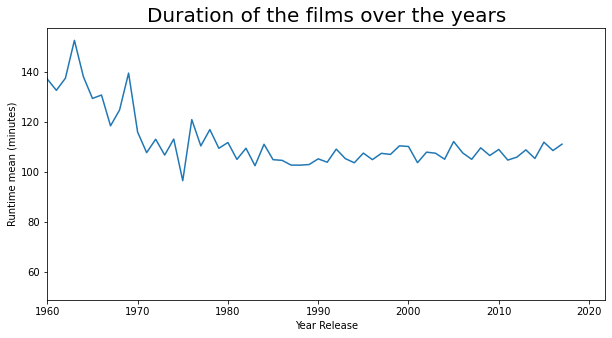

In [24]:
grupByMovies=data['runtime'].groupby(data["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Runtime mean (minutes)", fontsize=10)
x.set_title('Duration of the films over the years', fontsize=20)

#We made the x axis starting from 1960 in previous year there were way few film in order to have a decent graph
x.set_xlim(1960)

In [25]:
data.describe()

,id,budget,popularity,runtime,revenue,release_year
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,3000.000000
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07,1999.713000
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08,15.423313
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,1921.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06,1993.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,2004.000000
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07,2011.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,2017.000000


In [26]:
# Si vuole sviluppare un algoritmo che, in base al genere del film che uscirà, preveda, grazie ai "vicini", quanto potrebbe
# guadagnare al botteghino
# utilizzo dell'algoritmo knn

#out: lista di tutti i generi presenti nel DB
out = []
for lista_generi_per_film in data['genres']:
    if not isinstance(lista_generi_per_film, float):
        for genere in lista_generi_per_film:
            if genere['name'] not in out:
                out.append(genere['name'])
            
print(out)

['Comedy', 'Drama', 'Action', 'Adventure', 'Family', 'Fantasy', 'Romance', 'History', 'Mystery', 'Horror', 'Thriller', 'Crime', 'War', 'Music', 'Western', 'Science Fiction', 'Animation', 'Documentary', 'Foreign', 'TV Movie']


In [38]:
data.isnull().sum()


id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_year                0
dtype: int64

In [41]:
data["Keywords"][1]

[{'id': 2505, 'name': 'coronation'},
 {'id': 4263, 'name': 'duty'},
 {'id': 6038, 'name': 'marriage'},
 {'id': 13072, 'name': 'falling in love'}]

,popularity_norm,runtime_norm,budget_norm
count,3000.000000,2998.000000,3000.000000
mean,0.028754,0.319102,0.059293
std,0.041123,0.065344,0.097437
min,0.000000,0.000000,0.000000
25%,0.013651,0.278107,0.000000
50%,0.025056,0.307692,0.021053
75%,0.037002,0.349112,0.076316
max,1.000000,1.000000,1.000000
